In [8]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

# drght_time_slice = slice('2017-01-01', '2020-03-31')
drght_name = 'recent_drght'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'
# drght_dir = 'GLM_results_' + drght_name + '/validation/'

# select a spatial point 
lat_pt = -37.75  # 0.827 (frac of time spent in drought)
lon_pt = 147     

# lat_pt = -37.5   # 0.513
# lon_pt = 148

# lat_pt = -34     # 0.557
# lon_pt = 150

# lat_pt = -33.75  # 0.604
# lon_pt = 149.5

# lat_pt = -37
# lon_pt = 148

val_file = drght_dir + '/' + drght_name + '_crude_validation_lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_2018.nc'
ds_all_prob = xr.open_dataset(val_file)
ds_all_prob

<xarray.Dataset>
Dimensions:                   (time: 365, timescale: 3)
Coordinates:
  * time                      (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * timescale                 (timescale) int64 2 6 12
    lat                       float32 ...
    lon                       float32 ...
    quantile                  float64 ...
    dayofyear                 (time) int64 ...
    parameter                 object ...
Data variables:
    hist_break_prob           (timescale, time) float64 ...
    hist_events               (timescale, time) int64 ...
    hist_break_prob_distinct  (timescale, time) float64 ...
    hist_events_distinct      (timescale, time) int64 ...
    glm_break_prob            (timescale, time) float64 ...

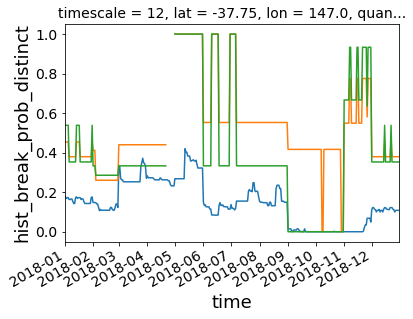

In [9]:
ts_sel = 12
xlim = (min(ds_all_prob.time.values), max(ds_all_prob.time.values))
ds_all_prob['glm_break_prob'].sel(timescale = ts_sel).plot(xlim = xlim)
ds_all_prob['hist_break_prob'].sel(timescale = ts_sel).plot()
ds_all_prob['hist_break_prob_distinct'].sel(timescale = ts_sel).plot()

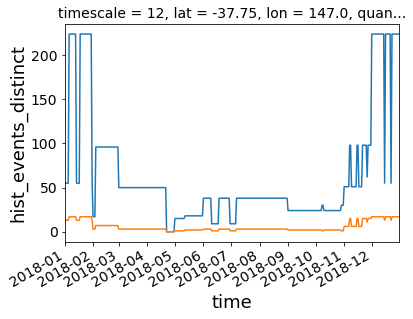

In [10]:
ts_sel = 12
xlim = (min(ds_all_prob.time.values), max(ds_all_prob.time.values))
ds_all_prob['hist_events'].sel(timescale = ts_sel).plot(xlim = xlim)
ds_all_prob['hist_events_distinct'].sel(timescale = ts_sel).plot()

In [11]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

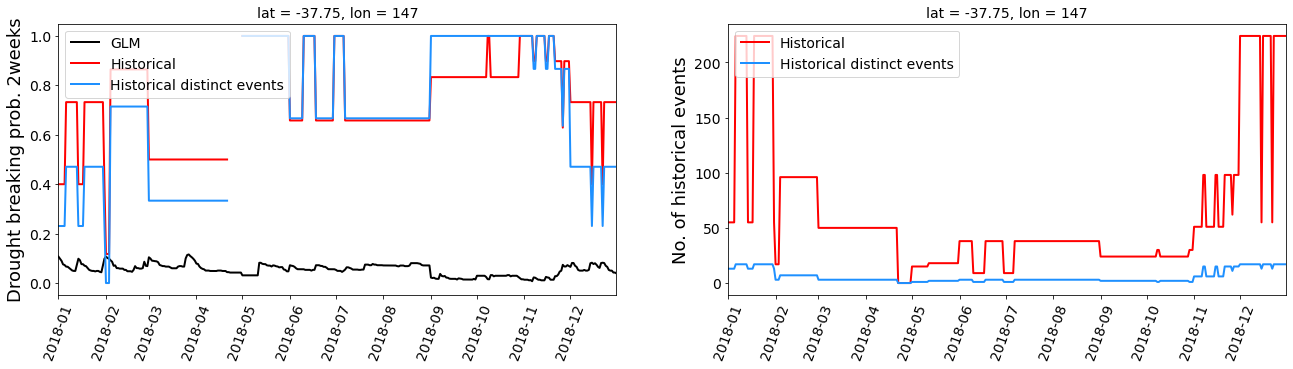

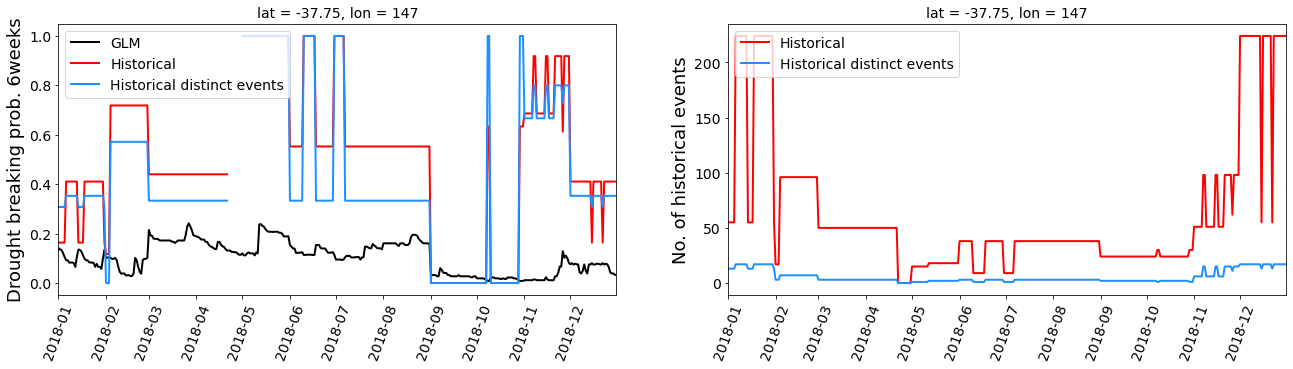

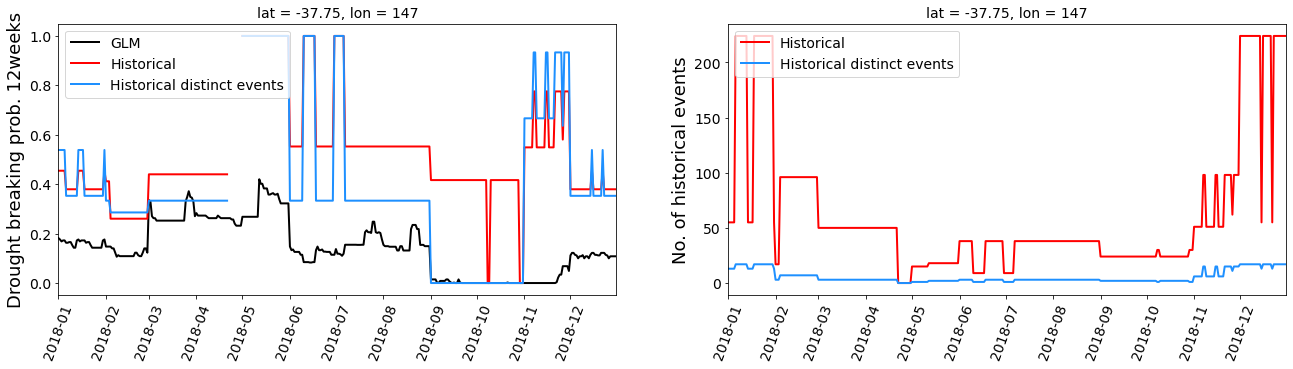

In [12]:
import matplotlib.pyplot as plt

fig_dir = 'figures/drought_events/validation/'

for ts in [2, 6, 12]:

    fig, axs = plt.subplots(1,2, figsize=(22, 5))
    axs = axs.flatten()
    titleText = 'lat = ' + str(lat_pt) + ', lon = ' + str(lon_pt)

    xlim = (min(ds_all_prob.time.values), max(ds_all_prob.time.values))

    colors = ["black", "red", "dodgerblue"]
    plot_data_0 = [ds_all_prob['glm_break_prob'].sel(timescale = ts), 
                 ds_all_prob['hist_break_prob'].sel(timescale = ts), 
                 ds_all_prob['hist_break_prob_distinct'].sel(timescale = ts)]
    plot_data_1 = [ds_all_prob['hist_events'].sel(timescale = ts), 
                 ds_all_prob['hist_events_distinct'].sel(timescale = ts)]
    labels = ['GLM', 'Historical', 'Historical distinct events']
    ylab = ['Drought breaking prob. ' + str(ts) + 'weeks', 'No. of historical events']

    for color, label, data in zip(colors, labels, plot_data_0):
        axs[0].plot(data.time, data.values, color = color, linewidth = 2, label = label)
    axs[0].set(ylabel = ylab[0])
    
    for color, label, data in zip(colors[1:], labels[1:], plot_data_1):
        axs[1].plot(data.time, data.values, color = color, linewidth = 2, label = label)
    axs[1].set(ylabel = ylab[1])
        
    for i in range(2):
        legend = axs[i].legend(loc='upper left')
        axs[i].set(title = titleText)
        axs[i].tick_params(axis='x', rotation=70)
        axs[i].set_xlim(xlim)

    figname = 'prob_comparison_' + drght_name + '_lat' + str(lat_pt) + '_lon' + str(lon_pt) + '_timescale_' + str(ts) + '_2018.png'
    plt.savefig(fig_dir + figname)

### Using Jason's easier method of validation
#### Working with the calculated datasets for the recent drought for code development; need to use the full record once those calculations are complete

In [51]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'recent_drght'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

prob_band = np.linspace(0.1, 0.9, 9).round(2)
hist_prob_files = [drght_dir + '/' + 'hist_prob_drought_break_band' + str(i) + '.nc' for i in prob_band]
sum_drght_events_files = [drght_dir + '/' + 'sum_drought_events_band' + str(i) + '.nc' for i in prob_band]

drop_coords = ['quantile', 'parameter']
ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)               # historical probability estimated from the data after binning by GLM prob bands
ds_sum_events = xr.open_mfdataset(sum_drght_events_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)  # number of historical drought events within the probability band

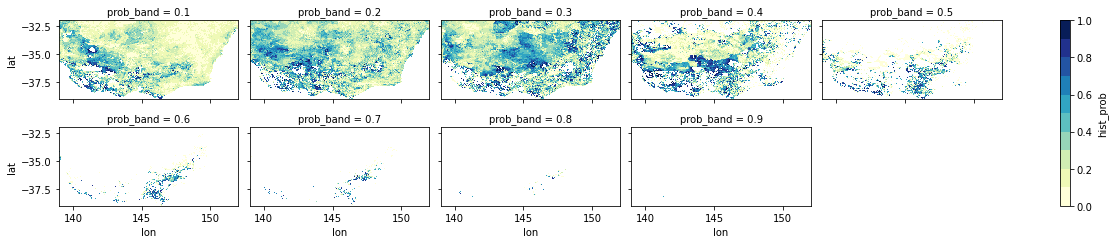

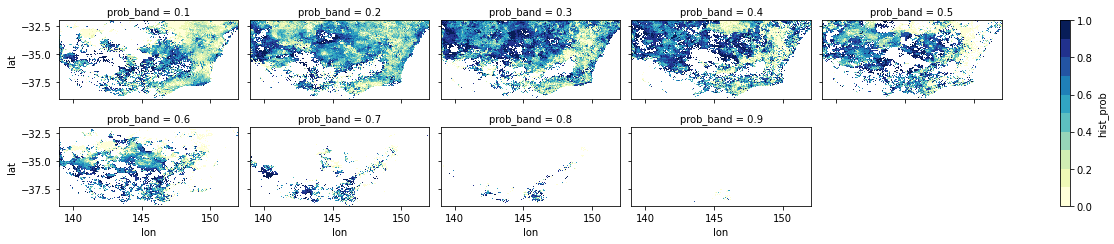

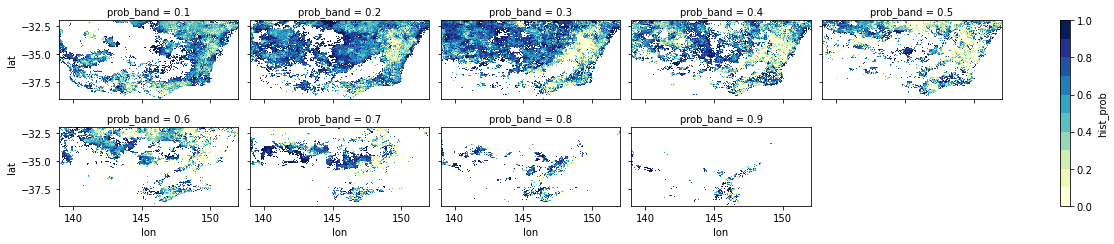

In [53]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

for ts in [2, 6, 12]:
    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_prob['hist_prob'].sel(timescale = ts).plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 5, cmap = "YlGnBu", aspect = aspect, size = 1.75, levels=list(np.linspace(0, 1, 11).round(2)))
    # plt.savefig(outdir + figname)

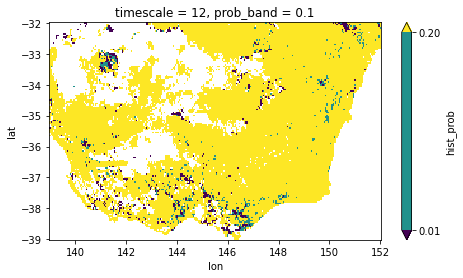

In [59]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

ts = 12
prob_sel = 0.1
cmap = plt.cm.get_cmap('viridis')
cmap_sel = list(cmap([0, 0.5, 1]))

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
ds_prob['hist_prob'].sel(timescale = ts, prob_band = prob_sel).plot(x = "lon", y = "lat", colors = cmap_sel, aspect = aspect, size = 4, levels=[max(prob_sel-0.1, 0.01), prob_sel+0.1])

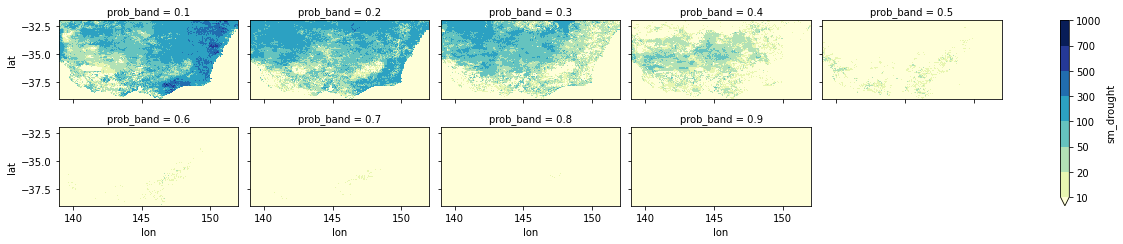

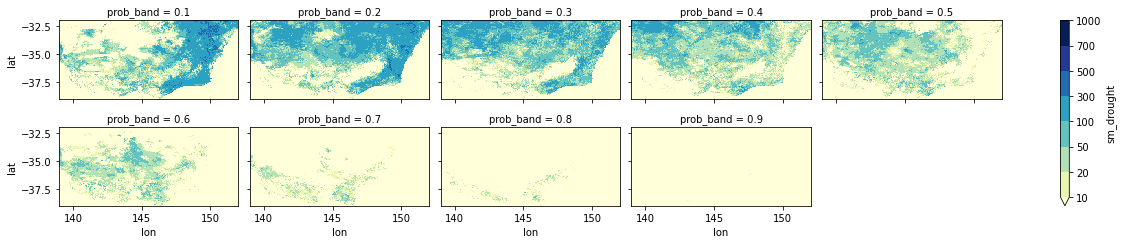

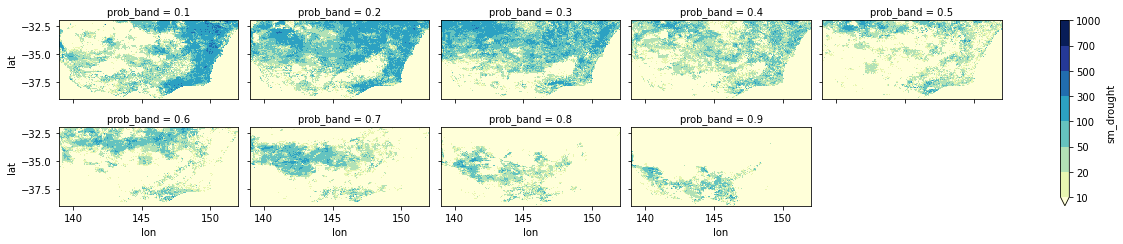

In [56]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

for ts in [2, 6, 12]:
    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_sum_events['sm_drought'].sel(timescale = ts).plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 5, cmap = "YlGnBu", aspect = aspect, size = 1.75, levels=[10, 20, 50, 100, 300, 500, 700, 1000])
# plt.savefig(outdir + figname)

### Validation using the full record

### 1. Validation based on SM drought

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)
hist_prob_files = [drght_dir + '/' + 'hist_prob_drought_break_band' + str(i) + '.nc' for i in prob_band]
sum_drght_events_files = [drght_dir + '/' + 'sum_drought_events_band' + str(i) + '.nc' for i in prob_band]

drop_coords = ['quantile', 'parameter']
ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)               # historical probability estimated from the data after binning by GLM prob bands
ds_sum_events = xr.open_mfdataset(sum_drght_events_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)  # number of historical drought events within the probability band

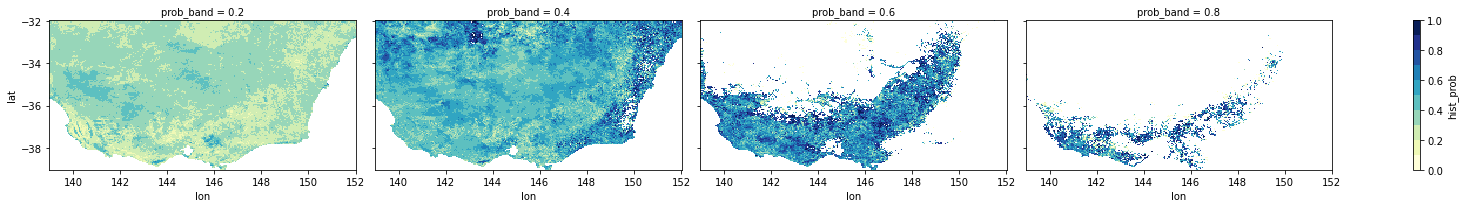

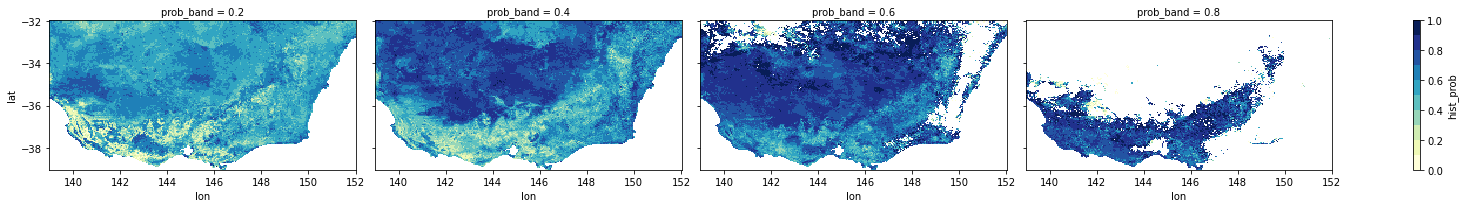

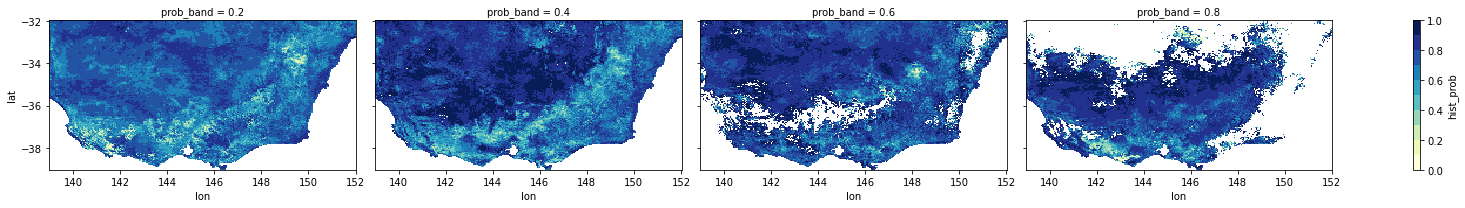

In [2]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

for ts in [2, 6, 12]:
    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_prob['hist_prob'].sel(timescale = ts).plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "YlGnBu", aspect = aspect, size = 3, levels=list(np.linspace(0, 1, 11).round(2)))
    figname = 'hist_prob_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'
    plt.savefig(outdir + figname)

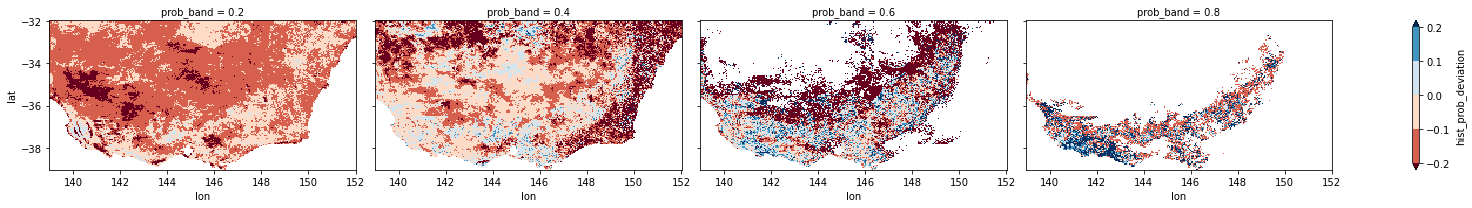

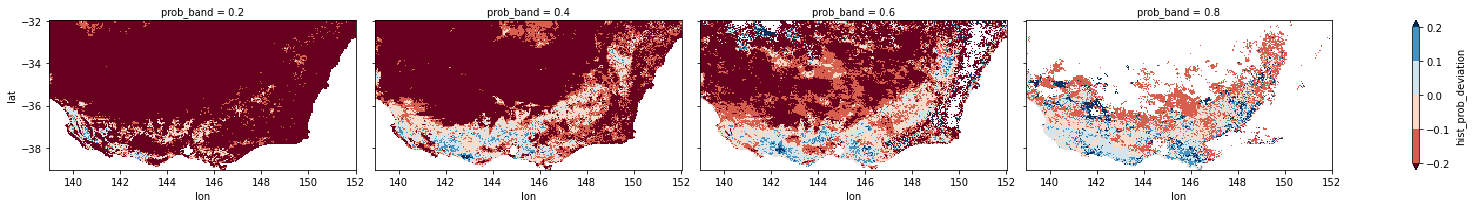

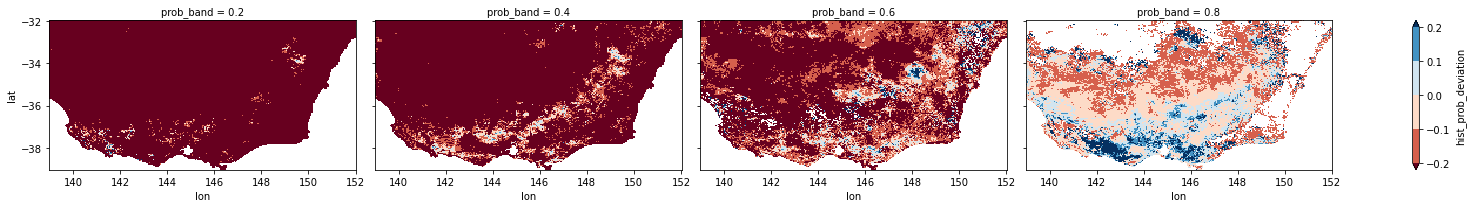

In [3]:
# deviations from expected probabilities
ds_prob['hist_prob_deviation'] = ds_prob['prob_band'] - ds_prob['hist_prob']

outdir = 'figures/drought_events/validation/'

for ts in [2, 6, 12]:
    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_prob['hist_prob_deviation'].sel(timescale = ts).plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'hist_prob_deviation_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'
    plt.savefig(outdir + figname)

### 2. Validation based on P-E-Q exceedences

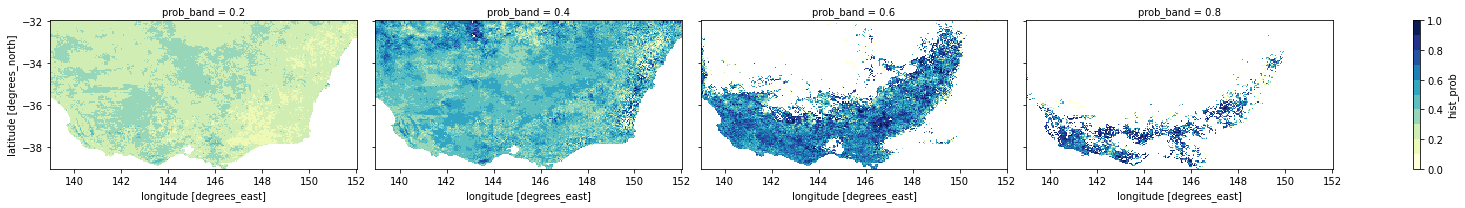

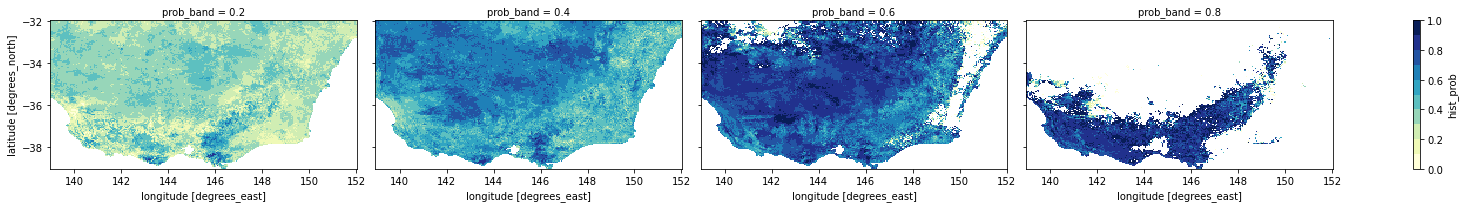

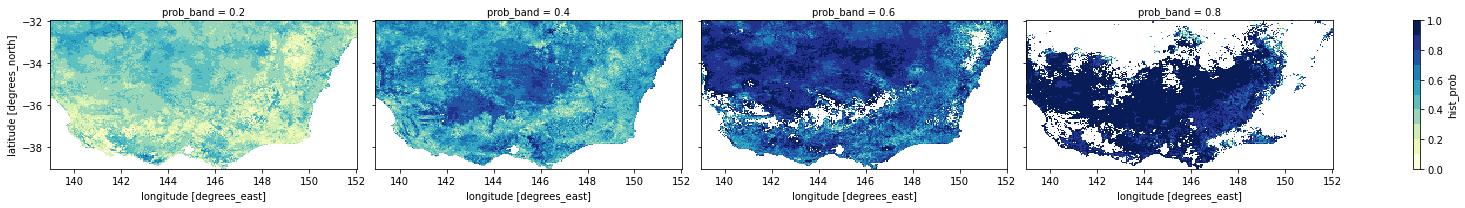

In [4]:
# plot validation results based on P-E-Q

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    ds_prob['hist_prob'].plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "YlGnBu", aspect = aspect, size = 3, levels=list(np.linspace(0, 1, 11).round(2)))
    figname = 'PmEQ_hist_prob_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'
    plt.savefig(outdir + figname)

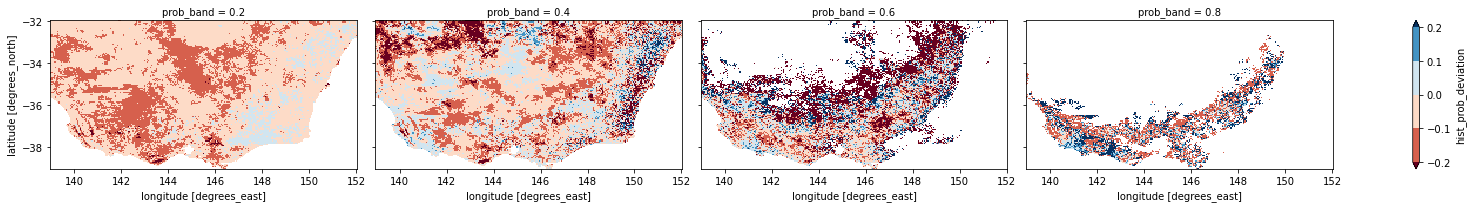

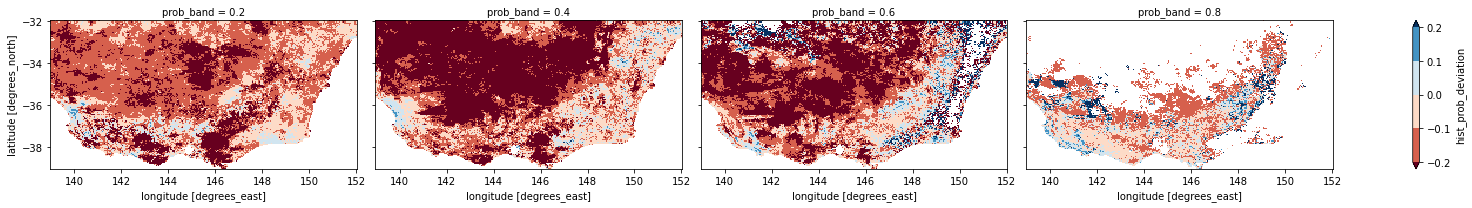

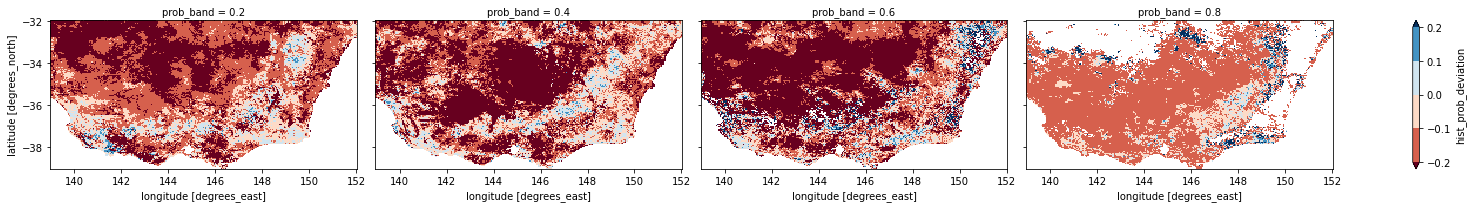

In [6]:
# plot validation results based on P-E-Q

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    ds_prob['hist_prob_deviation'] = ds_prob['prob_band'] - ds_prob['hist_prob']
    ds_prob['hist_prob_deviation'].plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'PmEQ_hist_prob_deviation_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

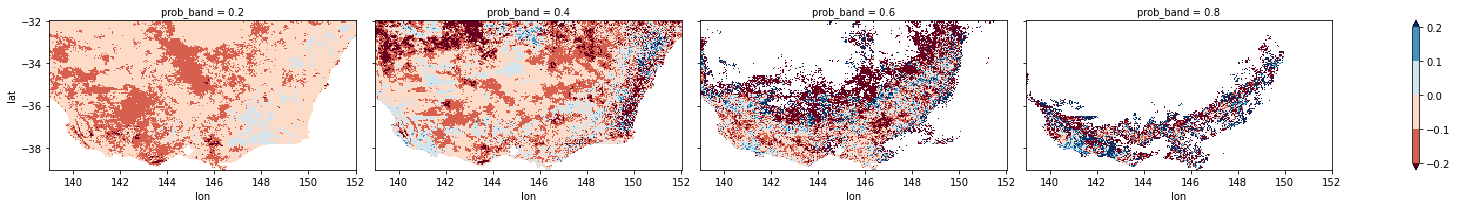

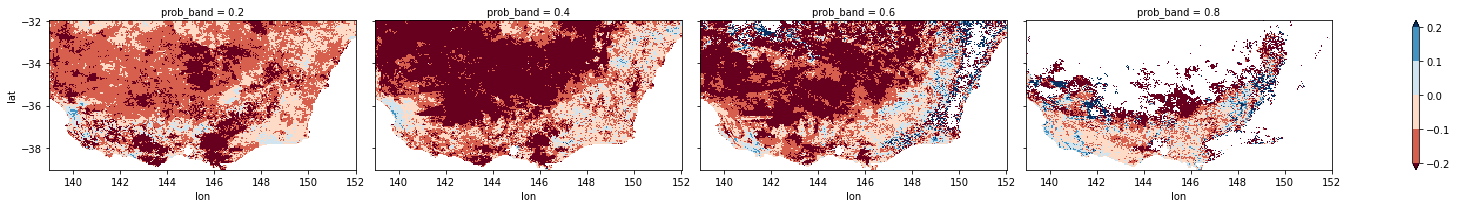

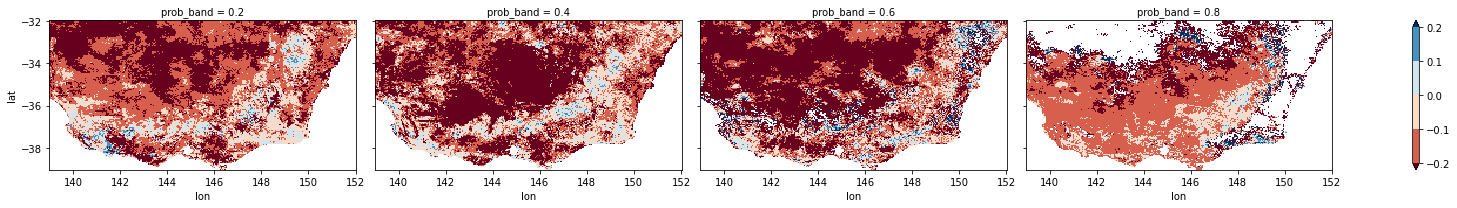

In [1]:
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

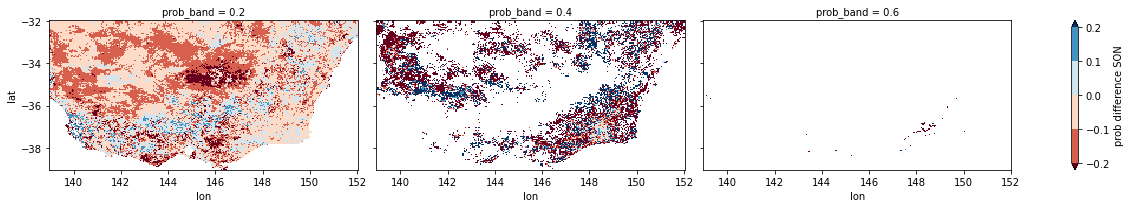

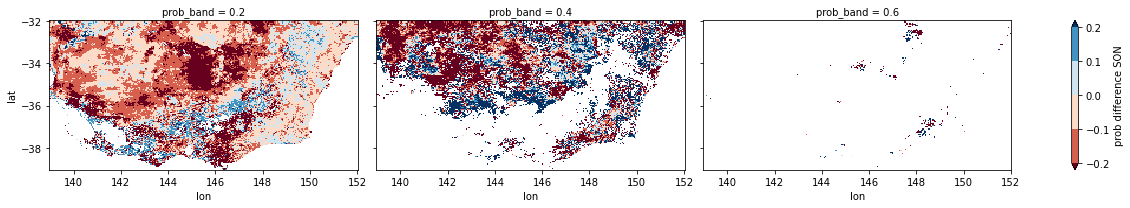

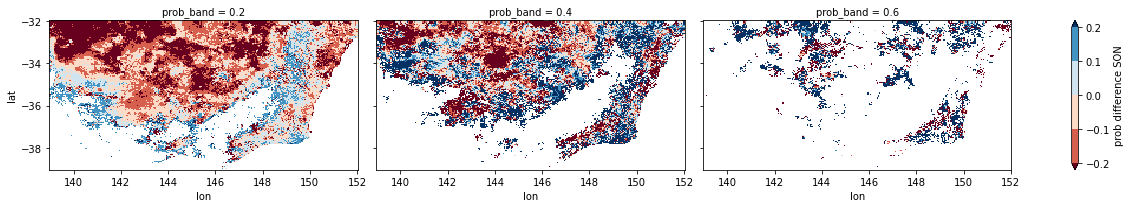

In [4]:
# plot validation results based on P-E-Q as differences from the mean GLM estimate by season

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.6, 3).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 3, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

### Does using only the days that were originally used to build the model make a difference?

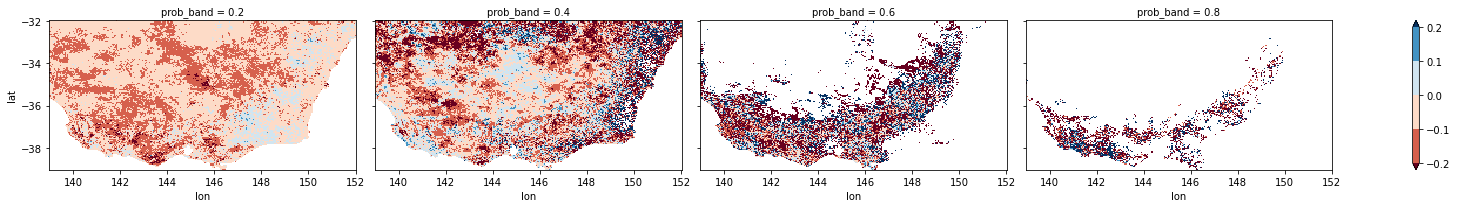

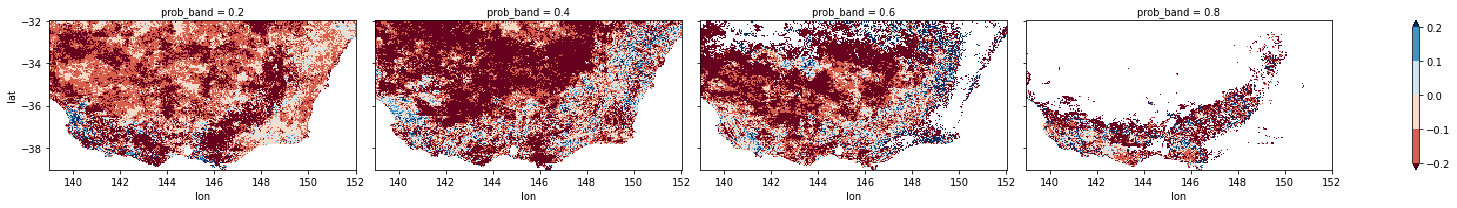

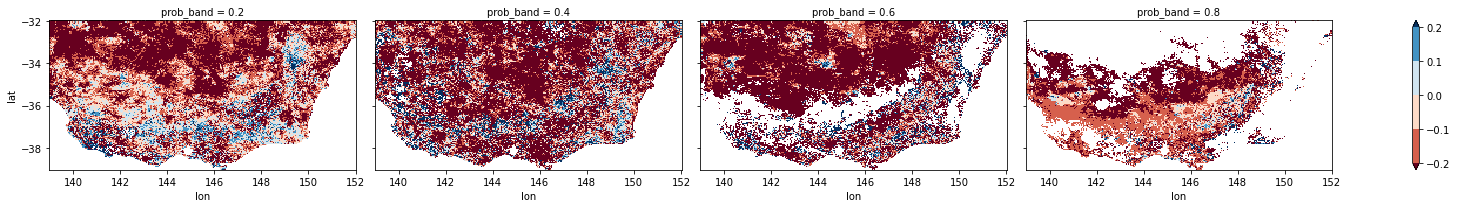

In [1]:
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results_time_subset/hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results_time_subset/mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'timeSubset_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

### Is the underestimation due to an assymetry in the influence of large scale climate modes?
#### a) Validation results after grouping the time points by predictors (soipos, soineg, dmipos, dmineg)
#### b) Validation results after splitting the record into two (does trends in the predictors influence the fit?)

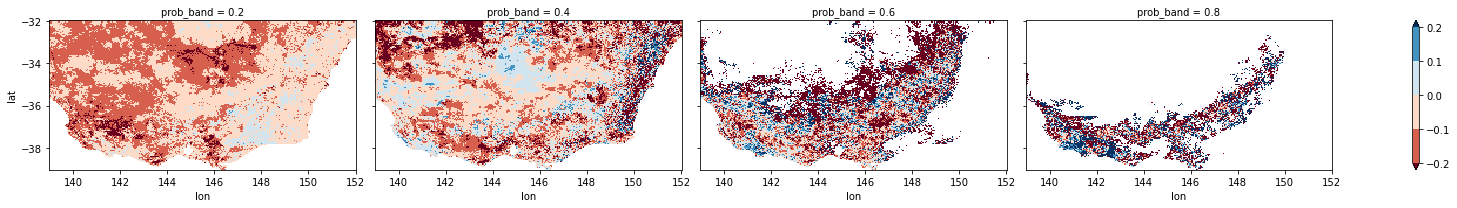

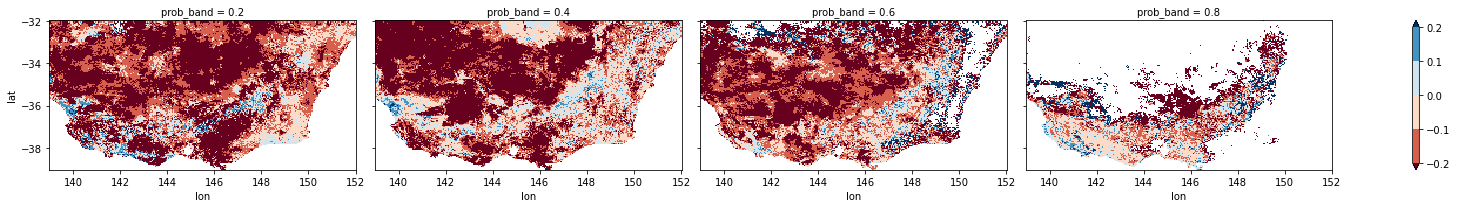

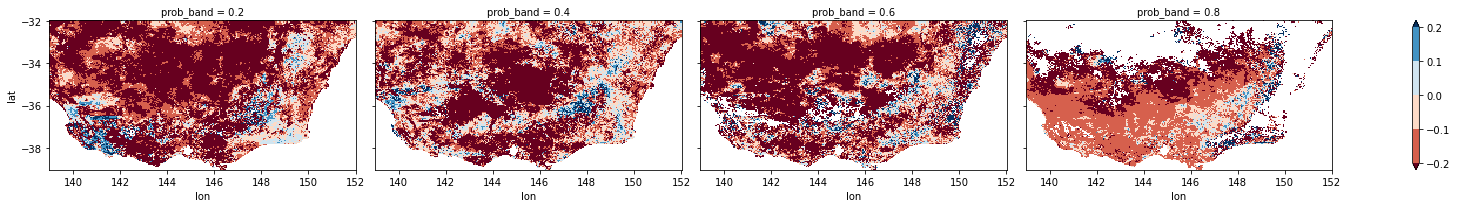

In [1]:
# Biases in SOI positive days
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/soipos_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/soipos_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'soipos_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

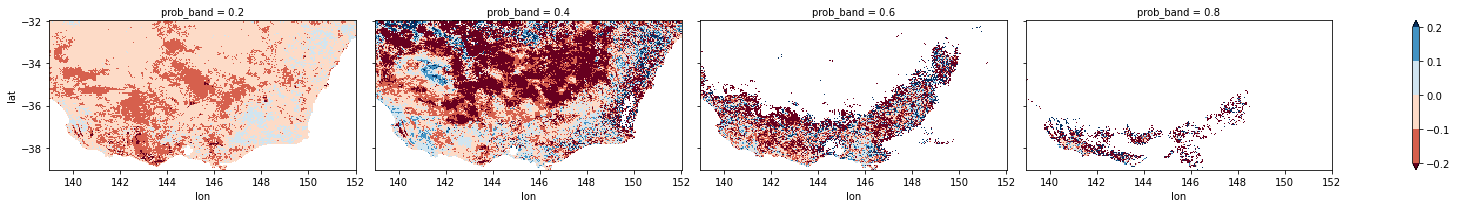

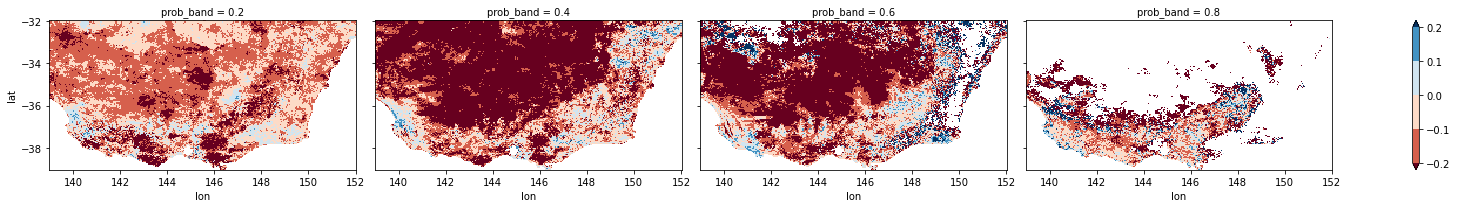

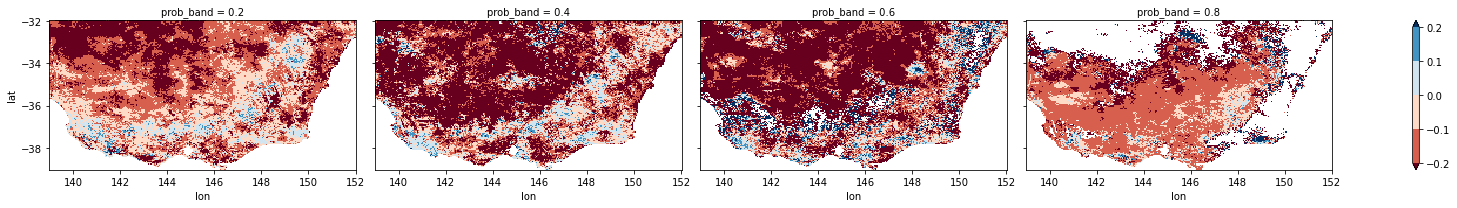

In [2]:
# Biases in SOI negative days
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/soineg_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/soineg_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'soineg_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

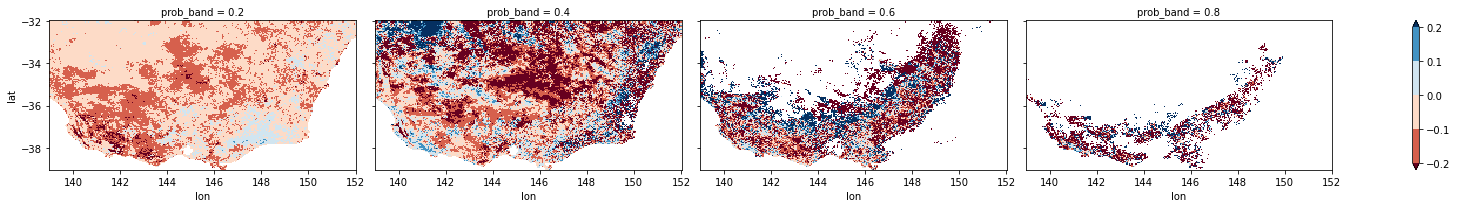

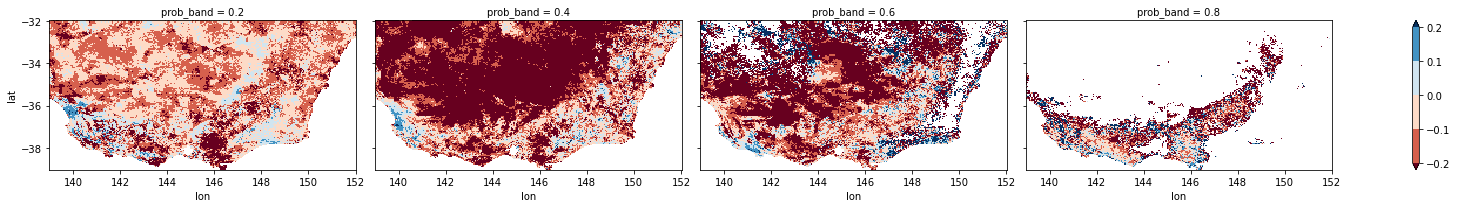

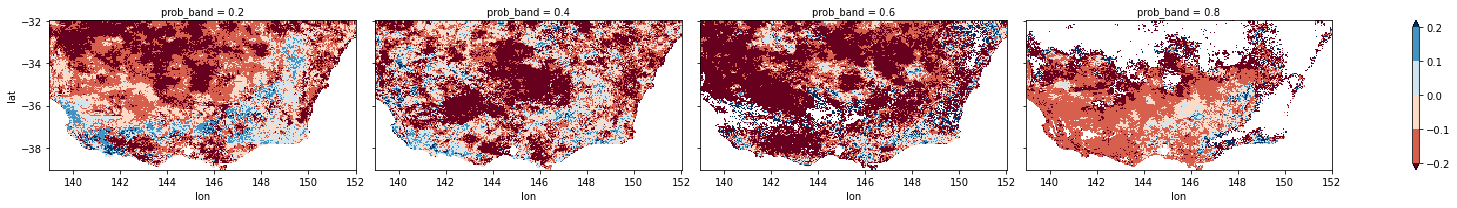

In [3]:
# Biases in DMI positive days
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/dmipos_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/dmipos_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'dmipos_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

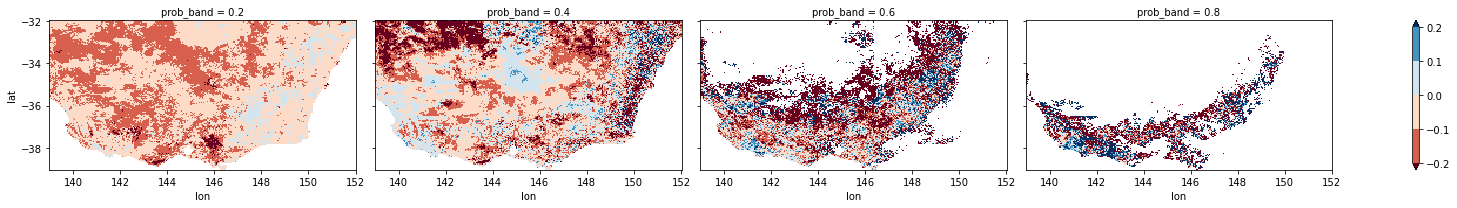

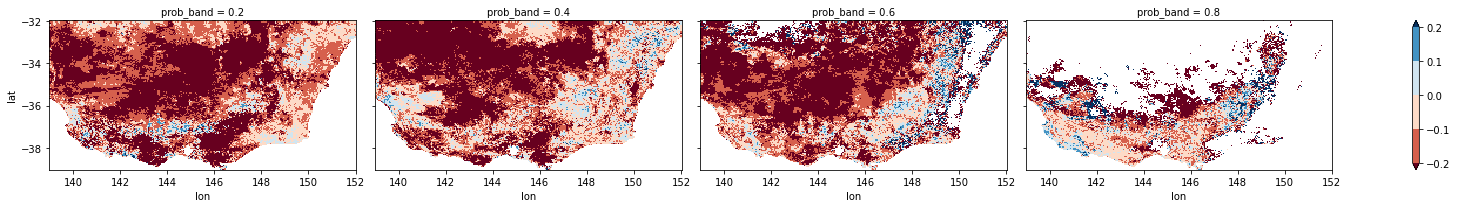

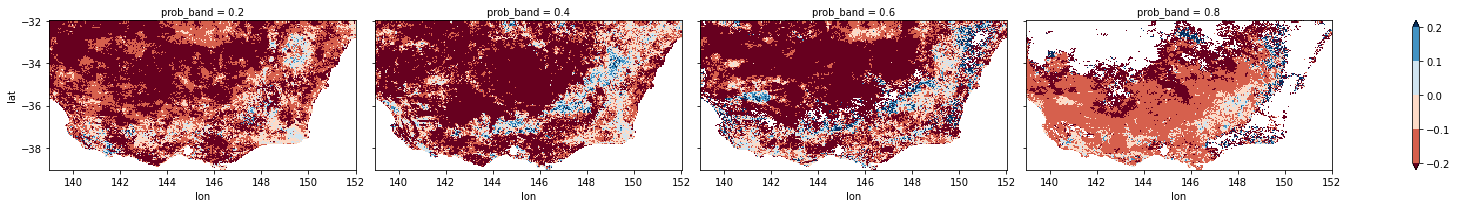

In [4]:
# Biases in DMI negative days
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/dmineg_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/dmineg_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'dmineg_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

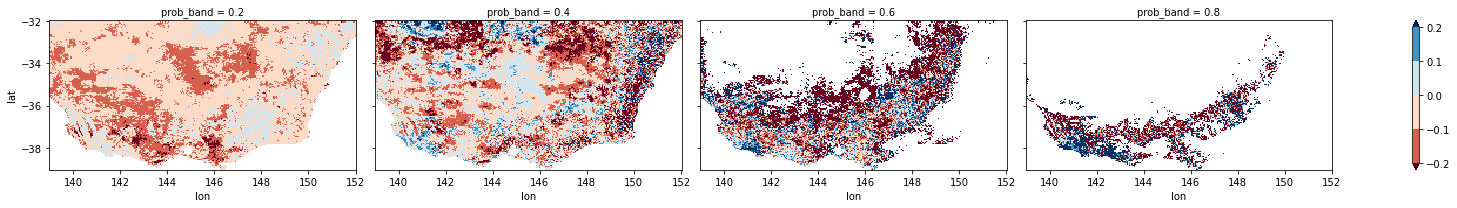

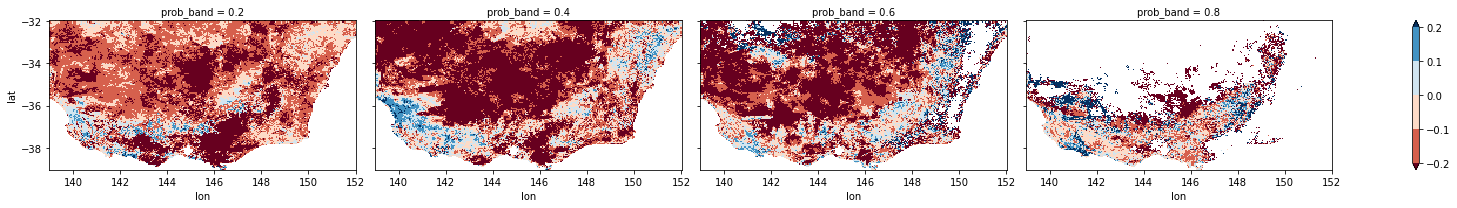

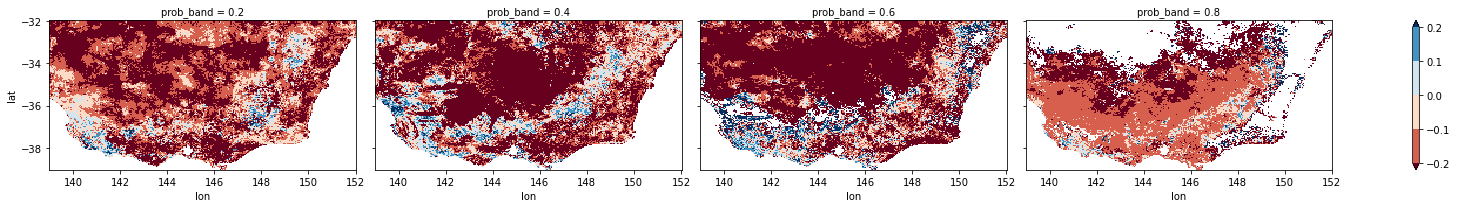

In [5]:
# Biases in upto 1960 timeslice
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/upto1960_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/upto1960_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'upto1960_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

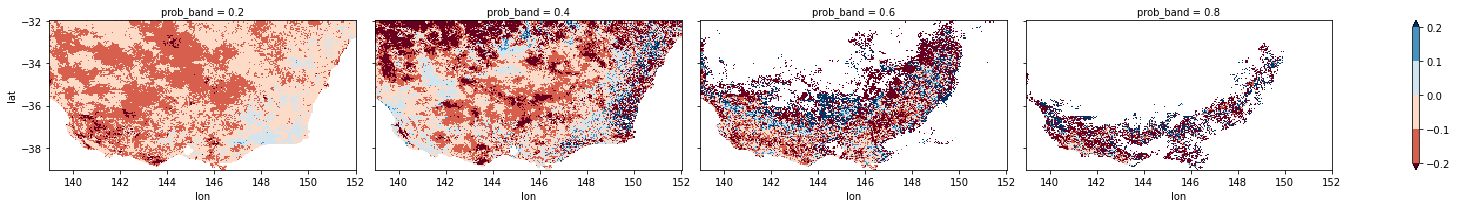

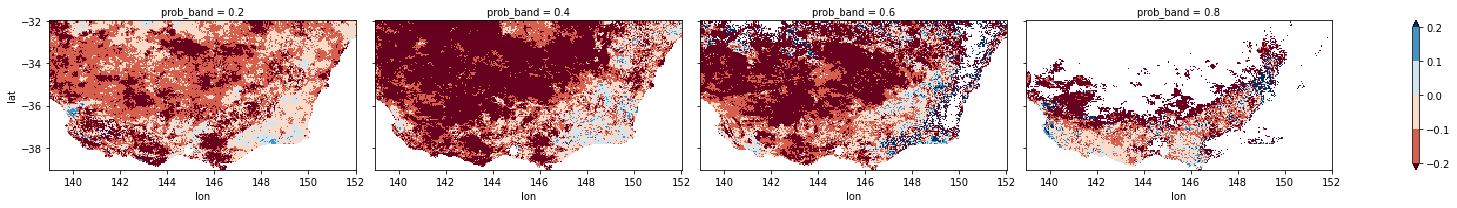

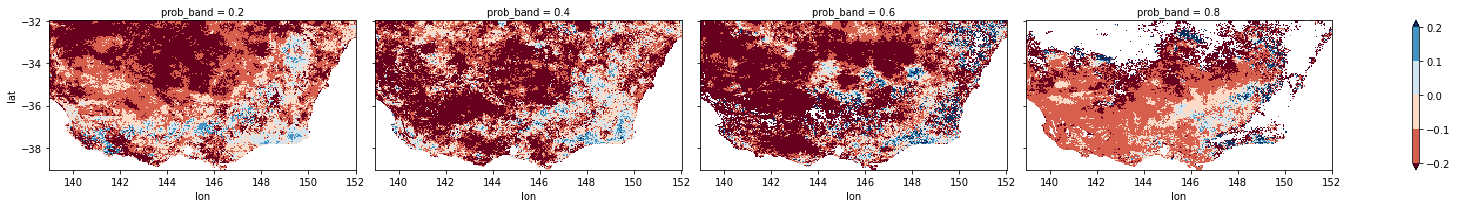

In [6]:
# Biases in upto 1960 timeslice
# plot validation results based on P-E-Q as differences from the mean GLM estimate

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.8, 4).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/post1960_hist_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/post1960_mean_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = ds_glm['glm_probability'] - ds_prob['hist_prob']
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'post1960_PmEQ_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

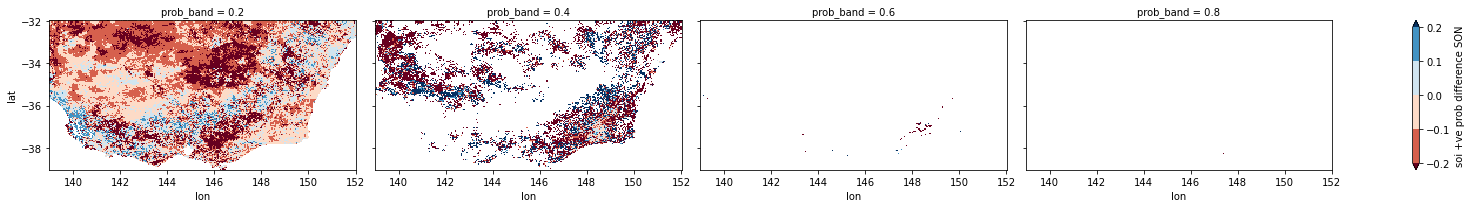

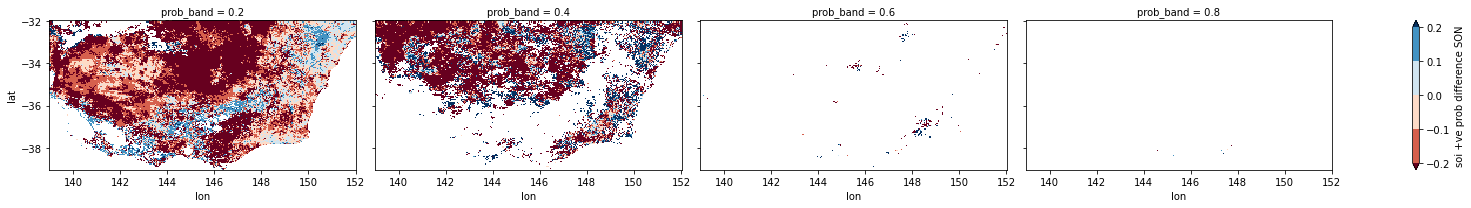

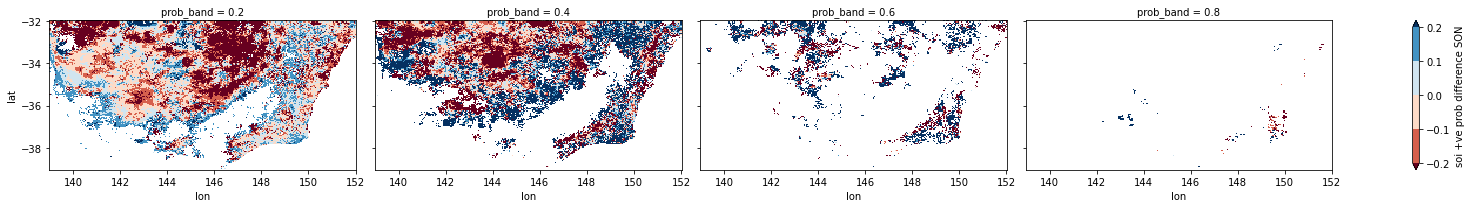

In [6]:
# plot differences in the influence of climate drivers by season - SOI positive

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/soipos_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/soipos_mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('soi +ve prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'soipos_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

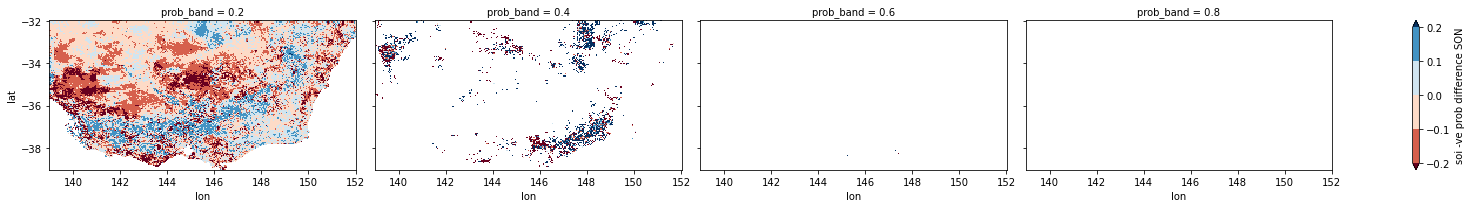

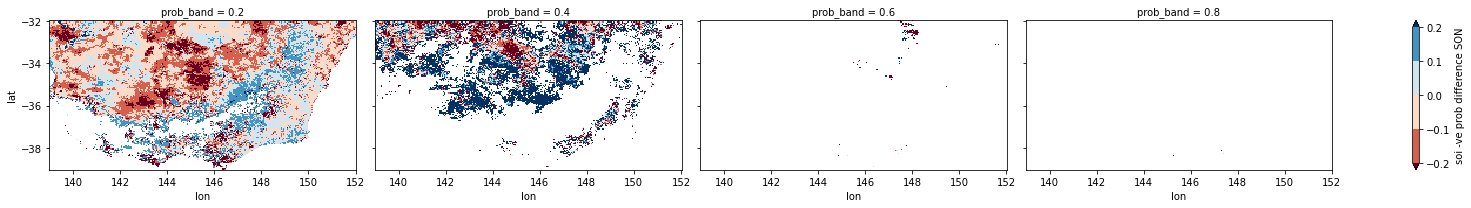

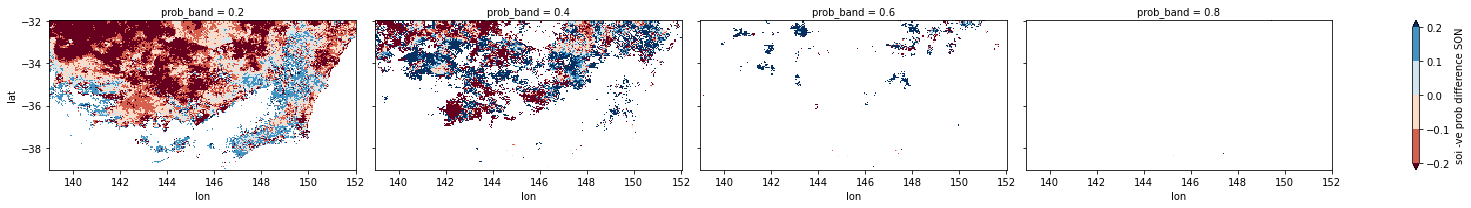

In [10]:
# plot differences in the influence of climate drivers by season - SOI positive

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/soineg_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/soineg_mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('soi -ve prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'soineg_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

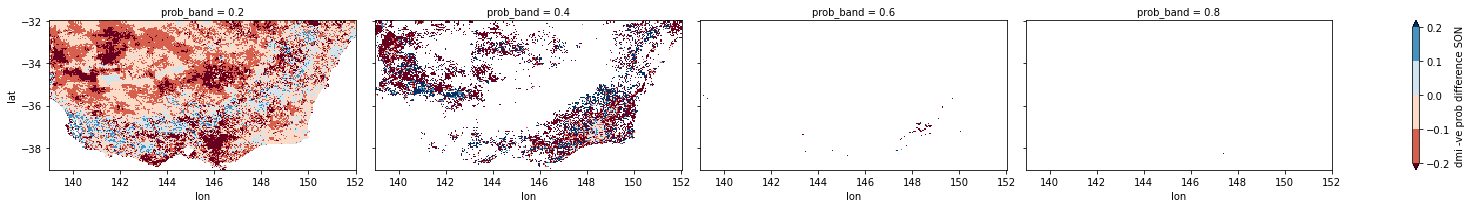

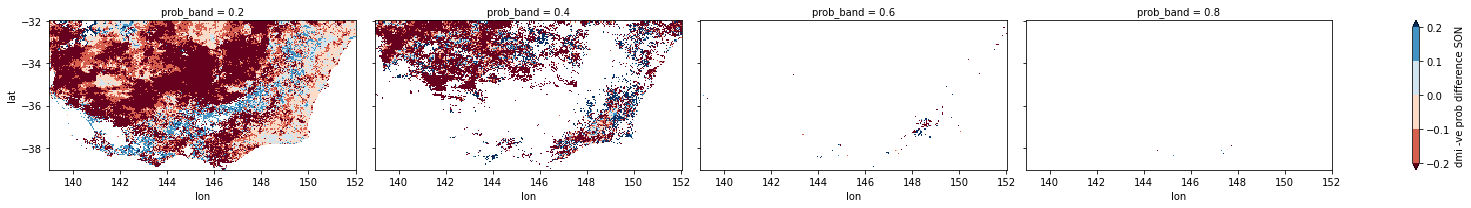

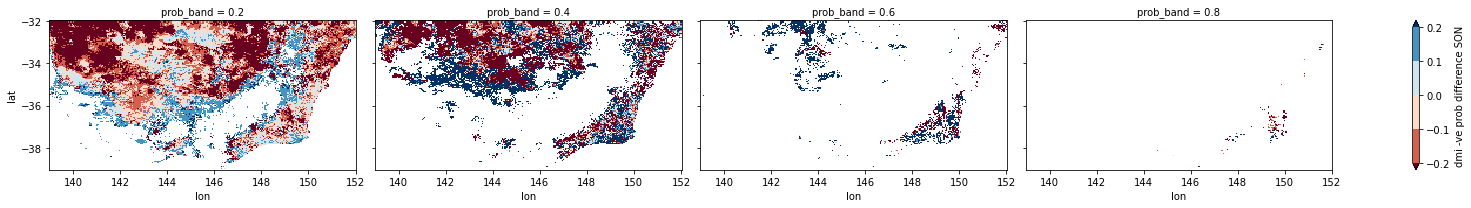

In [14]:
# plot differences in the influence of climate drivers by season - DMI negative

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/dmineg_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/dmineg_mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('dmi -ve prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'dmineg_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

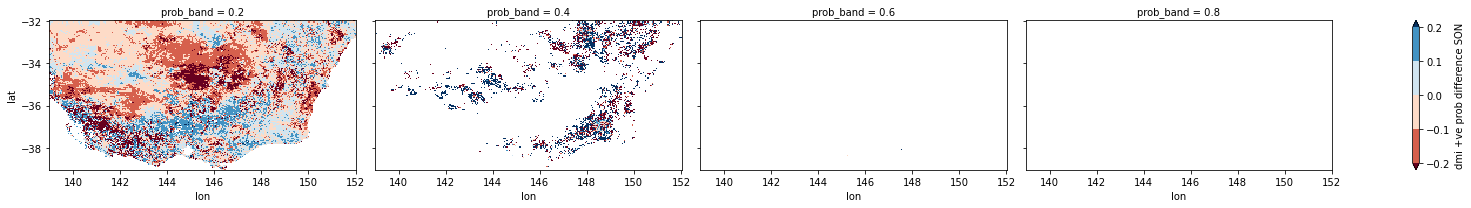

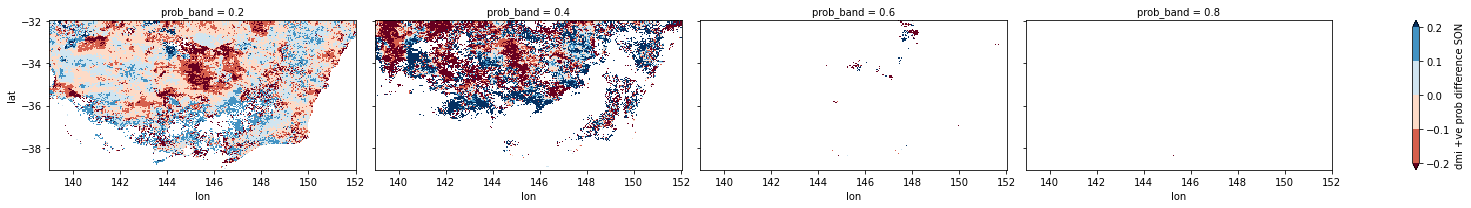

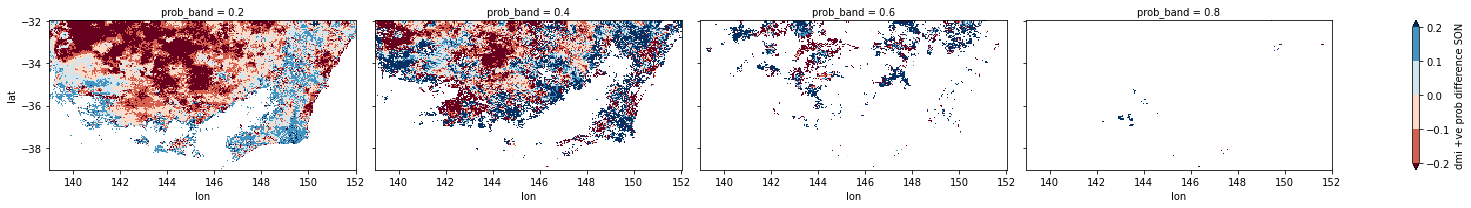

In [19]:
# plot differences in the influence of climate drivers by season - DMI positive

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/dmipos_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/dmipos_mean_glm_seas_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('dmi +ve prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'dmipos_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

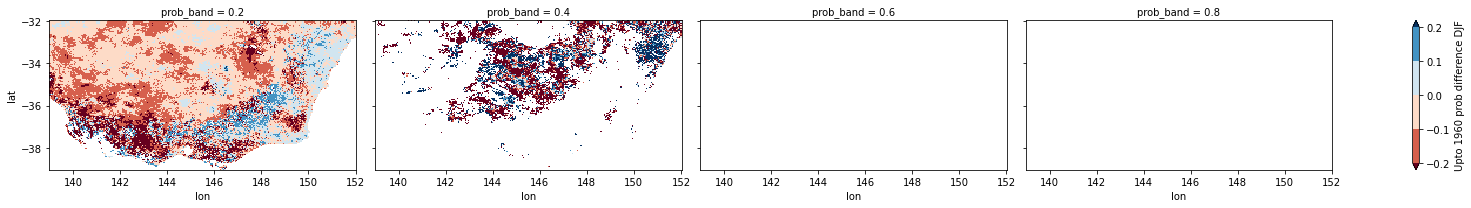

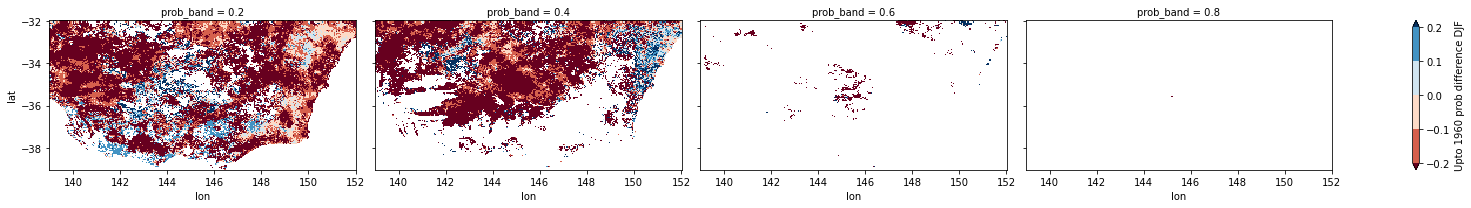

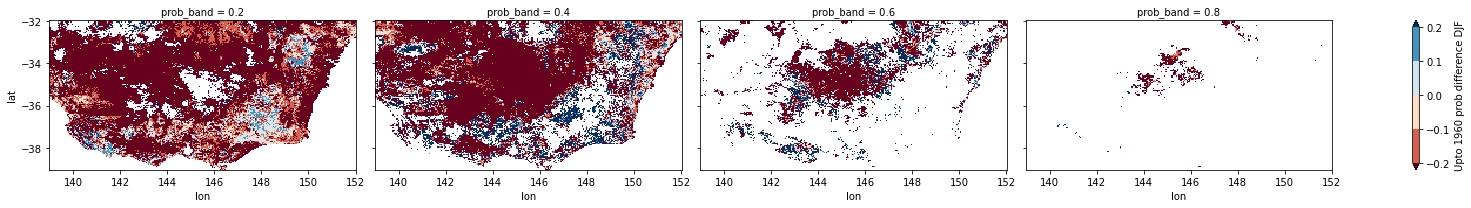

In [27]:
# plot differences in the influence of climate drivers by season - upto 1960

seas_sel = 'DJF'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/upto1960_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/upto1960_mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('Upto 1960 prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'upto1960_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

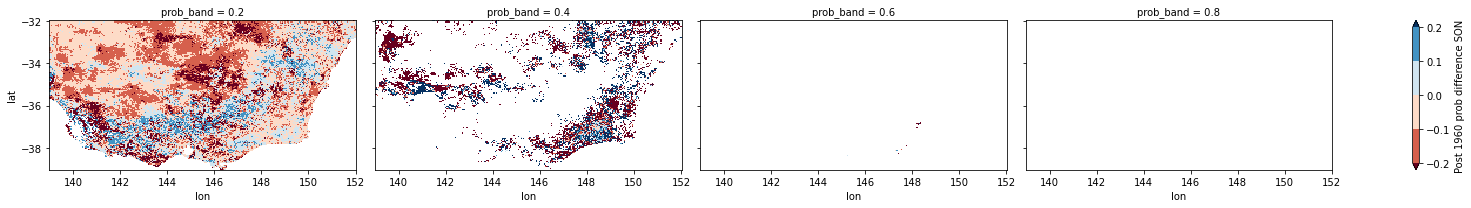

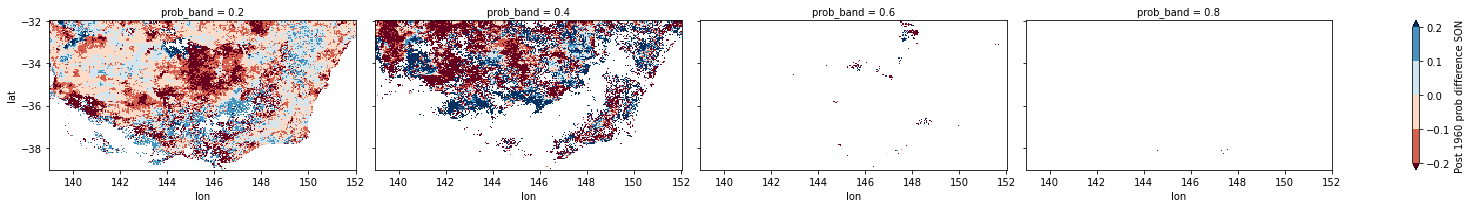

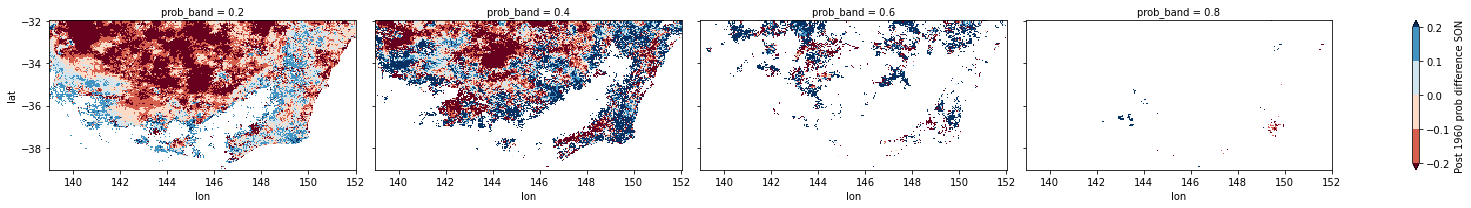

In [31]:
# plot differences in the influence of climate drivers by season - post1960

seas_sel = 'SON'

import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_name = 'full_record'
drght_dir = main_dir + 'GLM_results_' + drght_name + '/validation/'

# prob_band = np.linspace(0.1, 0.9, 9).round(2)
prob_band = np.linspace(0.2, 0.6, 3).round(2)

import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

prob_band = np.linspace(0.2, 0.8, 4).round(2)
drop_coords = ['quantile', 'parameter']
lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

for ts in [2, 6, 12]:
    hist_prob_files = [drght_dir + '/PmEQ_results/post1960_hist_seas_prob_drought_break_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_prob = xr.open_mfdataset(hist_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    glm_prob_files = [drght_dir + '/PmEQ_results/post1960_mean_seas_glm_probability_prob_band' + str(i) + '_weeks' + str(ts) + '.nc' for i in prob_band]
    ds_glm = xr.open_mfdataset(glm_prob_files, combine = "nested", concat_dim = "prob_band").sel(season = seas_sel).assign_coords({"prob_band": prob_band}).drop(drop_coords)
    
    prob_deviation = (ds_glm['glm_probability'] - ds_prob['hist_prob']).rename('Post 1960 prob difference ' + seas_sel)
    prob_deviation.plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "RdBu", aspect = aspect, size = 3, levels=list(np.linspace(-0.2, 0.2, 5).round(2)))
    figname = 'post1960_PmEQ_' + seas_sel + '_hist_prob_deviation_from_glm_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'    
    plt.savefig(outdir + figname)

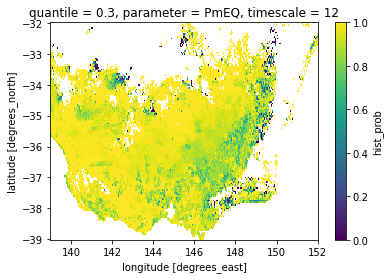

In [2]:
import xarray as xr
ds_soi_8 = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/GLM_results_full_record/validation/PmEQ_results/soipos_hist_prob_drought_break_band0.8.nc')
ds_soi_8['hist_prob'].plot()

In [5]:
ds_soi_8 = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/GLM_results_full_record/validation/PmEQ_results/soipos_hist_prob_drought_break_band0.6.nc')
ds_soi_8
# ds_soi_8['hist_prob'].plot()

<xarray.Dataset>
Dimensions:    (lat: 141, lon: 261)
Coordinates:
  * lat        (lat) float32 -39.0 -38.95 -38.9 -38.85 ... -32.1 -32.05 -32.0
  * lon        (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 151.9 152.0
Data variables:
    quantile   float64 ...
    parameter  object ...
    timescale  int64 ...

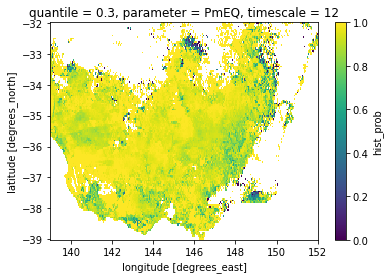

In [3]:
ds_neg_8 = xr.open_dataset('/g/data/w97/ad9701/p_prob_analysis/temp_files/GLM_results_full_record/validation/PmEQ_results/soineg_hist_prob_drought_break_band0.8.nc')
ds_neg_8['hist_prob'].plot()

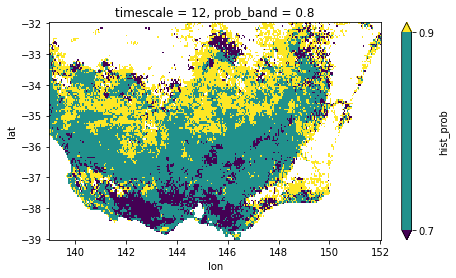

In [29]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/'

ts = 12
prob_sel = 0.8
cmap = plt.cm.get_cmap('viridis')
cmap_sel = list(cmap([0, 0.5, 1]))

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size
ds_prob['hist_prob'].sel(timescale = ts, prob_band = prob_sel).plot(x = "lon", y = "lat", colors = cmap_sel, aspect = aspect, size = 4, levels=[max(prob_sel-0.1, 0.01), prob_sel+0.1])

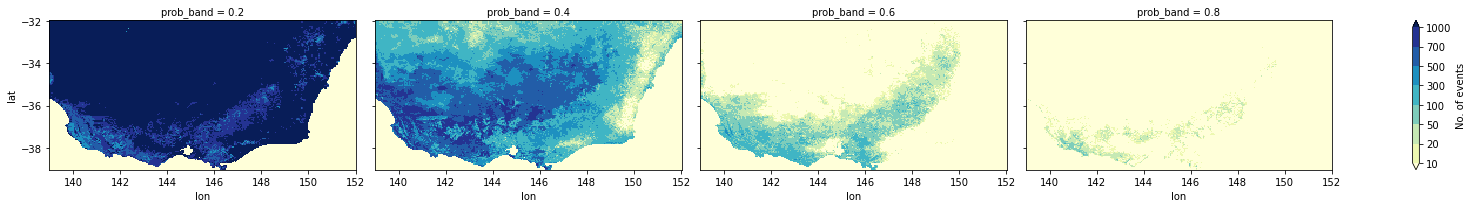

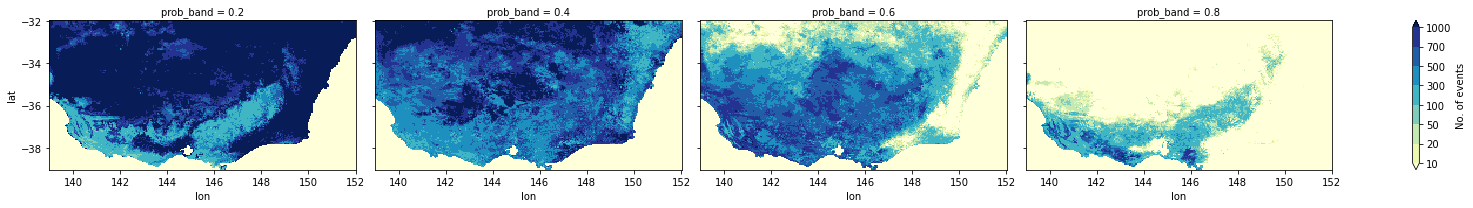

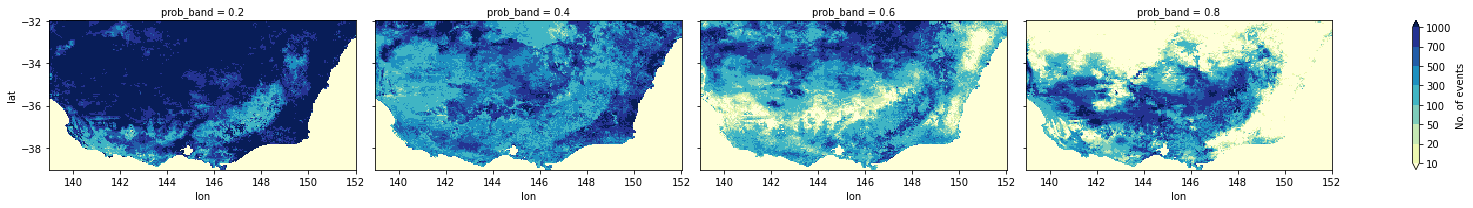

In [33]:
import matplotlib.pyplot as plt
outdir = 'figures/drought_events/validation/'

for ts in [2, 6, 12]:
    lat_size = -32-(-39)
    lon_size = 152-139
    aspect = lon_size/lat_size
    ds_sum_events['sm_drought'].sel(timescale = ts).rename('No. of events').plot(x = "lon", y = "lat", col = "prob_band", col_wrap = 4, cmap = "YlGnBu", aspect = aspect, size = 3, levels=[10, 20, 50, 100, 300, 500, 700, 1000])
    figname = 'Number_of_events_' + drght_name +  '_timescale_' + str(ts) + 'weeks_byProbBand.png'
    plt.savefig(outdir + figname)
# plt.savefig(outdir + figname)